In [39]:
import pandas as pd
import os

# 1. 파일 경로 설정
file_path = '/scratch2/tjgus0408/CMU/data/Labeled_OpenAP.csv'

# 2. 사용할 컬럼 목록 정의
selected_columns = [
    'HexIdent', 
    'Date_MSG_Generated', 
    'Time_MSG_Generated',
    'Date_MSG_Logged', 
    'Time_MSG_Logged', 
    'Altitude', 
    'GroundSpeed',
    'Track', 
    'Latitude', 
    'Longitude', 
    'VerticalRate', 
    'IsOnGround',
    "Phase"
]

# 3. 데이터 로드 (파일이 존재하는지 확인 후 로드)
if os.path.exists(file_path):
    try:
        # usecols 파라미터를 사용하여 필요한 컬럼만 읽어오면 메모리를 절약할 수 있습니다.
        df = pd.read_csv(file_path, usecols=selected_columns)
        
        print("✅ 데이터 로드 성공!")
        print(f"데이터 크기 (행, 열): {df.shape}")
        
        # 데이터 미리보기
        print("\n[상위 5개 행]")
        print(df.head())
        
        # 데이터 타입 및 결측치 확인
        print("\n[데이터 정보]")
        print(df.info())
        
    except Exception as e:
        print(f"❌ 데이터 로드 중 오류 발생: {e}")
else:
    print(f"❌ 파일을 찾을 수 없습니다: {file_path}")

✅ 데이터 로드 성공!
데이터 크기 (행, 열): (7381665, 13)

[상위 5개 행]
  HexIdent Date_MSG_Generated Time_MSG_Generated Date_MSG_Logged  \
0   A4CE9D         2025-12-16           00:00:48      2025-12-16   
1   C03D1A         2025-12-16           00:00:48      2025-12-16   
2   7C01C2         2025-12-16           00:01:47      2025-12-16   
3   71BE25         2025-12-16           00:01:47      2025-12-16   
4   A74992         2025-12-16           00:01:47      2025-12-16   

  Time_MSG_Logged  Altitude  GroundSpeed       Track   Latitude   Longitude  \
0        00:00:47   33200.0   456.000000  357.000000  30.315516  -81.384689   
1        00:00:48    9725.0   310.000000   25.000000  27.696581  -99.336159   
2        00:01:45    4425.0   172.069748  250.301376 -34.005066  151.094742   
3        00:01:46   32275.0   493.432861  344.724518 -32.386169  149.509094   
4        00:01:46    8325.0   309.000000  103.000000  40.098003  -75.839806   

   VerticalRate  IsOnGround Phase  
0          1344         NaN

In [19]:
df["Phase"].unique()

array(['CL', 'DE', 'LVL', 'CR', nan, 'GND'], dtype=object)

In [40]:

    
    # ---------------------------------------------------------
    # [핵심 단계] 시계열 정렬을 위한 전처리
    # ---------------------------------------------------------

# 1. 날짜와 시간을 합쳐서 하나의 datetime 컬럼 생성 (Date_MSG_Generated + Time_MSG_Generated 사용)
# 데이터가 문자열(object) 형태여도 pd.to_datetime이 똑똑하게 변환해줍니다.
print("⏳ 날짜와 시간 병합 중...")
df['Timestamp'] = pd.to_datetime(df['Date_MSG_Generated'] + ' ' + df['Time_MSG_Generated'])

df_multi = df.sort_values(by=['HexIdent', 'Timestamp']).set_index(['HexIdent', 'Timestamp'])

# 1. 고유한 값 추출 (NumPy 배열 형태)
# df_multi = df.sort_values(by=['HexIdent', 'Timestamp']).set_index(['HexIdent', 'Timestamp'])
unique_hex_ids = df["HexIdent"].unique()

# 2. (선택 사항) 파이썬 리스트 형태로 변환 (다루기 더 편함)
hex_id_list = unique_hex_ids.tolist()

# 결과 확인
print(f"총 고유 ID 개수: {len(hex_id_list)}")
print("ID 목록 (상위 10개):", hex_id_list[:10])

⏳ 날짜와 시간 병합 중...
총 고유 ID 개수: 52712
ID 목록 (상위 10개): ['A4CE9D', 'C03D1A', '7C01C2', '71BE25', 'A74992', 'A94B51', '495302', 'A3DC47', 'A3AD5A', 'AA98CD']


In [41]:
df_multi

Date_MSG_Generated Time_MSG_Generated  \
HexIdent Timestamp                                                   
1        2025-12-15 20:23:19         2025-12-15           20:23:19   
         2025-12-15 20:24:31         2025-12-15           20:24:31   
         2025-12-15 20:25:03         2025-12-15           20:25:03   
         2025-12-15 20:26:08         2025-12-15           20:26:08   
         2025-12-15 20:31:18         2025-12-15           20:31:18   
...                                         ...                ...   
F3E9B    2025-12-16 13:37:25         2025-12-16           13:37:25   
F3F30A   2025-12-16 14:31:44         2025-12-16           14:31:44   
F4147D   2025-12-16 13:59:01         2025-12-16           13:59:01   
F9EAC7   2025-12-16 10:29:25         2025-12-16           10:29:25   
FFE8C4   2025-12-16 10:27:25         2025-12-16           10:27:25   

                             Date_MSG_Logged Time_MSG_Logged  Altitude  \
HexIdent Timestamp                                                       
1        2025-12-15 20:23:19      2025-12-15        20:23:16    1575.0   
         2025-12-15 20:24:31      2025-12-15        20:24:28    1575.0   
         2025-12-15 20:25:03      2025-12-15        20:25:03    1575.0   
         2025-12-15 20:26:08      2025-12-15        20:26:07    1575.0   
         2025-12-15 20:31:18      2025-12-15        20:31:15     600.0   
...                                      ...             ...       ...   
F3E9B    2025-12-16 13:37:25      2025-12-16        13:37:20     692.0   
F3F30A   2025-12-16 14:31:44      2025-12-16        14:31:44    3232.0   
F4147D   2025-12-16 13:59:01      2025-12-16        13:59:01     748.0   
F9EAC7   2025-12-16 10:29:25      2025-12-16        10:29:21    1168.0   
FFE8C4   2025-12-16 10:27:25      2025-12-16        10:27:23     499.0   

                              GroundSpeed       Track   Latitude  Longitude  \
HexIdent Timestamp                                                            
1        2025-12-15 20:23:19   112.893753   18.595440  26.898514 -80.541351   
         2025-12-15 20:24:31   118.067780   88.058510  26.907257 -80.505890   
         2025-12-15 20:25:03   118.016945   89.028976  26.907990 -80.482147   
         2025-12-15 20:26:08   122.004097   89.530373  26.908173 -80.442627   
         2025-12-15 20:31:18    75.000000  141.000000  31.397873 -85.479828   
...                                   ...         ...        ...        ...   
F3E9B    2025-12-16 13:37:25     0.000000    0.000000  51.935318   7.743733   
F3F30A   2025-12-16 14:31:44     0.000000    0.000000  49.972782   7.997833   
F4147D   2025-12-16 13:59:01     0.000000    0.000000  51.528332   6.994650   
F9EAC7   2025-12-16 10:29:25     0.000000    0.000000  51.608131   6.888450   
FFE8C4   2025-12-16 10:27:25     0.000000    0.000000  51.615284   6.845350   

                              VerticalRate  IsOnGround Phase  
HexIdent Timestamp                                            
1        2025-12-15 20:23:19             0         NaN   LVL  
         2025-12-15 20:24:31            64         NaN   LVL  
         2025-12-15 20:25:03           -64         NaN   LVL  
         2025-12-15 20:26:08             0         NaN   LVL  
         2025-12-15 20:31:18           -64         NaN   LVL  
...                                    ...         ...   ...  
F3E9B    2025-12-16 13:37:25             0         NaN   NaN  
F3F30A   2025-12-16 14:31:44             0         NaN   NaN  
F4147D   2025-12-16 13:59:01             0         NaN   NaN  
F9EAC7   2025-12-16 10:29:25             0         NaN   NaN  
FFE8C4   2025-12-16 10:27:25             0         NaN   NaN  

[7381665 rows x 12 columns]

In [64]:
import pandas as pd

# ---------------------------------------------------------
# [가정] df가 이미 로드되어 있고, Timestamp 컬럼이 datetime 형식이라고 가정
# (만약 MultiIndex라면 reset_index()를 먼저 수행하여 컬럼으로 내려줍니다)
if 'HexIdent' not in df.columns or 'Timestamp' not in df.columns:
    df = df.reset_index()
# ---------------------------------------------------------

# 1. 데이터 길이가 20개 이하인 HexIdent 제거 (Filtering)
# ---------------------------------------------------------
print(f"전처리 전 데이터 크기: {len(df)}")

# 각 HexIdent별 데이터 개수 계산
counts = df.groupby('HexIdent').size()

# 20개보다 큰 HexIdent만 추출 (Index 리스트)
valid_hex_ids = counts[counts > 20].index

# 해당 HexIdent를 가진 행만 남김
df_filtered = df[df['HexIdent'].isin(valid_hex_ids)].copy()

print(f"20개 이하 제거 후 데이터 크기: {len(df_filtered)}")


# 2. 1시간 이상 공백이 있으면 분리 (Segmentation)
# ---------------------------------------------------------

# (중요) HexIdent별, 그리고 시간순으로 정렬이 되어 있어야 정확히 계산됨
df_filtered = df_filtered.sort_values(by=['HexIdent', 'Timestamp'])

# (1) 이전 행과의 시간 차이 계산 (HexIdent 그룹별로 수행)
# HexIdent가 바뀌는 지점은 diff가 이상하게 나올 수 있으나, 어차피 그룹별로 처리하므로 상관없음
df_filtered['time_diff'] = df_filtered.groupby('HexIdent')['Timestamp'].diff()

# (2) 시간 차이가 1시간('1h')보다 큰 경우를 찾음 (True/False)
# 첫 번째 행(NaT)은 새로운 시작이므로 False(0) 처리 후 로직 적용
threshold = pd.Timedelta(minutes=30)
df_filtered['is_new_segment'] = (df_filtered['time_diff'] > threshold).fillna(False)

# (3) 누적 합(cumsum)을 통해 그룹 내에서 Segment 번호 부여
# 예: [False, False, True, False] -> [0, 0, 1, 1]
df_filtered['segment_id'] = df_filtered.groupby('HexIdent')['is_new_segment'].cumsum()


# 3. 최종 Instance ID 생성 (HexIdent + Segment 번호)
# ---------------------------------------------------------
# 예: A4CE9D_0, A4CE9D_1 ...
df_filtered['Unique_ID'] = df_filtered['HexIdent'] + "_" + df_filtered['segment_id'].astype(str)

# 불필요한 임시 컬럼 삭제
df_final = df_filtered.drop(columns=['time_diff', 'is_new_segment', 'segment_id'])

# 결과 확인
print(f"총 생성된 Instance(비행 단위) 개수: {df_final['Unique_ID'].nunique()}")
print(df_final[['HexIdent', 'Timestamp', 'Unique_ID']].head(10))

# ---------------------------------------------------------
# 4. 저장 및 활용 (Dictionary 형태로 변환 추천)
# ---------------------------------------------------------

# 각 Unique_ID를 Key로, 해당 데이터프레임을 Value로 갖는 딕셔너리 생성
instance_dict = {k: v for k, v in df_final.groupby('Unique_ID')}

# (선택 사항) 분할 후, 길이가 너무 짧은 Instance는 다시 제거하기
final_counts = df_final.groupby('Unique_ID').size()
valid_instances = final_counts[final_counts > 20].index
df_final_clean = df_final[df_final['Unique_ID'].isin(valid_instances)]

instance_dict = {k: v for k, v in df_final_clean.groupby('Unique_ID')}
# 사용 예시: 특정 인스턴스 꺼내기
# sample_key = list(instance_dict.keys())[0]
# print(f"\n[{sample_key}] 데이터:")
# print(instance_dict[sample_key].head())

전처리 전 데이터 크기: 7381665


20개 이하 제거 후 데이터 크기: 7296147
총 생성된 Instance(비행 단위) 개수: 156651
        HexIdent           Timestamp Unique_ID
318138         1 2025-12-15 20:23:19       1_0
1879707        1 2025-12-15 20:24:31       1_0
558776         1 2025-12-15 20:25:03       1_0
6504464        1 2025-12-15 20:26:08       1_0
4082327        1 2025-12-15 20:31:18       1_0
3204687        1 2025-12-15 20:32:26       1_0
5957459        1 2025-12-15 20:33:04       1_0
505539         1 2025-12-15 20:34:06       1_0
870939         1 2025-12-15 20:35:14       1_0
875739         1 2025-12-15 20:36:06       1_0


In [74]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------
# 수정된 Rolling Majority Vote 함수 (인덱스 충돌 방지)
# ---------------------------------------------------------
def rolling_majority_vote(series, window):
    # 1. 인덱스 문제 방지를 위해 값만 추출 (numpy array)
    values = series.values 
    
    # 2. 범주형 -> 숫자형 변환
    # pd.factorize는 (codes, uniques)를 반환하며, codes는 numpy array입니다.
    codes, uniques = pd.factorize(values)
    
    # factorize에서 NaN은 -1이 되므로, 이를 float NaN으로 변환 (Rolling 계산용)
    codes_float = codes.astype(float)
    codes_float[codes == -1] = np.nan
    
    # 3. Rolling 수행 (Pandas Series로 잠시 변환하여 rolling 사용)
    # 이때 인덱스는 무시하고 값만 사용하므로 안전합니다.
    rolled = pd.Series(codes_float).rolling(window=window, center=True, min_periods=1)
    
    # 최빈값 계산 함수
    def get_window_mode(x):
        valid_votes = x[~np.isnan(x)]
        if len(valid_votes) == 0:
            return np.nan
        vals, counts = np.unique(valid_votes, return_counts=True)
        return vals[np.argmax(counts)]

    # apply 적용 (결과는 numpy array로 받음)
    filled_codes = rolled.apply(get_window_mode, raw=True).values
    
    # 4. 숫자 -> 원래 문자열(Phase) 복구
    # 원본 시리즈 복사 (인덱스 유지를 위해)
    filled_series = series.copy()
    
    # 채워야 할 위치(mask) 확인
    mask = ~np.isnan(filled_codes)
    
    # [핵심 수정] numpy array 레벨에서 값을 할당하여 인덱스 에러 원천 차단
    # filled_series.values를 사용하여 직접 값을 넣습니다.
    # uniques[int] 인덱싱을 위해 마스크 된 부분만 정수로 변환
    filled_series.values[mask] = uniques[filled_codes[mask].astype(int)]
    
    return filled_series

# ---------------------------------------------------------
# 실행 코드 (이전과 동일)
# ---------------------------------------------------------
print("⏳ Local Majority Voting 시작...")

WINDOW_SIZE = 15

for unique_id, df_instance in instance_dict.items():
    if df_instance['Phase'].isna().sum() > 0:
        
        # 수정된 함수 호출
        voted_phase = rolling_majority_vote(df_instance['Phase'], WINDOW_SIZE)
        
        # 결과 업데이트 (fillna 사용)
        df_instance['Phase'] = df_instance['Phase'].fillna(voted_phase)
        
        # Fallback (앞뒤 채움)
        if df_instance['Phase'].isna().sum() > 0:
             df_instance['Phase'] = df_instance['Phase'].ffill().bfill()

print("✅ 모든 Instance에 대해 결측치 처리가 완료되었습니다.")

# 확인
total_nans = sum(df['Phase'].isna().sum() for df in instance_dict.values())
print(f"남은 Phase 결측치 개수: {total_nans}")

⏳ Local Majority Voting 시작...


✅ 모든 Instance에 대해 결측치 처리가 완료되었습니다.
남은 Phase 결측치 개수: 0


In [77]:
# list(instance_dict.keys())[:10]
instance_dict['100A2_0']

,HexIdent,Date_MSG_Generated,Time_MSG_Generated,Date_MSG_Logged,Time_MSG_Logged,Altitude,GroundSpeed,Track,Latitude,Longitude,VerticalRate,IsOnGround,Phase,Timestamp,Unique_ID
3027802,100A2,2025-12-15,20:42:28,2025-12-15,20:42:28,41000.0,542.000000,84.000000,21.128220,103.194427,0,NaN,CR,2025-12-15 20:42:28,100A2_0
3766402,100A2,2025-12-15,20:46:09,2025-12-15,20:46:08,41000.0,541.000000,84.000000,21.188900,103.779701,0,NaN,CR,2025-12-15 20:46:09,100A2_0
308559,100A2,2025-12-15,20:47:03,2025-12-15,20:47:03,41000.0,539.000000,84.000000,21.203711,103.925171,0,NaN,CR,2025-12-15 20:47:03,100A2_0
4576952,100A2,2025-12-15,20:48:05,2025-12-15,20:48:04,41000.0,534.000000,90.000000,21.214878,104.086151,0,NaN,CR,2025-12-15 20:48:05,100A2_0
7278714,100A2,2025-12-15,20:49:06,2025-12-15,20:49:06,41000.0,536.000000,90.000000,21.214188,104.249115,0,NaN,CR,2025-12-15 20:49:06,100A2_0
5330643,100A2,2025-12-15,20:50:00,2025-12-15,20:49:59,41000.0,537.000000,90.000000,21.213482,104.390968,0,NaN,CR,2025-12-15 20:50:00,100A2_0
1846494,100A2,2025-12-15,20:51:00,2025-12-15,20:50:57,41000.0,542.000000,84.000000,21.215439,104.543510,0,NaN,CR,2025-12-15 20:51:00,100A2_0
4433332,100A2,2025-12-15,20:52:02,2025-12-15,20:52:01,41000.0,548.000000,67.000000,21.265621,104.708961,-64,NaN,CR,2025-12-15 20:52:02,100A2_0
3270213,100A2,2025-12-15,20:53:06,2025-12-15,20:53:06,41000.0,548.000000,67.000000,21.330410,104.871338,-64,NaN,CR,2025-12-15 20:53:06,100A2_0
734339,100A2,2025-12-15,20:54:17,2025-12-15,20:54:16,41000.0,547.000000,67.000000,21.400017,105.046440,64,NaN,CR,2025-12-15 20:54:17,100A2_0


In [65]:
sample_key = list(instance_dict.keys())[0]
print(f"\n[{sample_key}] 데이터:")
print(instance_dict[sample_key].head())


[100A2_0] 데이터:
        HexIdent Date_MSG_Generated Time_MSG_Generated Date_MSG_Logged  \
3027802    100A2         2025-12-15           20:42:28      2025-12-15   
3766402    100A2         2025-12-15           20:46:09      2025-12-15   
308559     100A2         2025-12-15           20:47:03      2025-12-15   
4576952    100A2         2025-12-15           20:48:05      2025-12-15   
7278714    100A2         2025-12-15           20:49:06      2025-12-15   

        Time_MSG_Logged  Altitude  GroundSpeed  Track   Latitude   Longitude  \
3027802        20:42:28   41000.0        542.0   84.0  21.128220  103.194427   
3766402        20:46:08   41000.0        541.0   84.0  21.188900  103.779701   
308559         20:47:03   41000.0        539.0   84.0  21.203711  103.925171   
4576952        20:48:04   41000.0        534.0   90.0  21.214878  104.086151   
7278714        20:49:06   41000.0        536.0   90.0  21.214188  104.249115   

         VerticalRate  IsOnGround Phase           Timestam

가장 짧은 비행 길이: 1
가장 긴 비행 길이: 1238


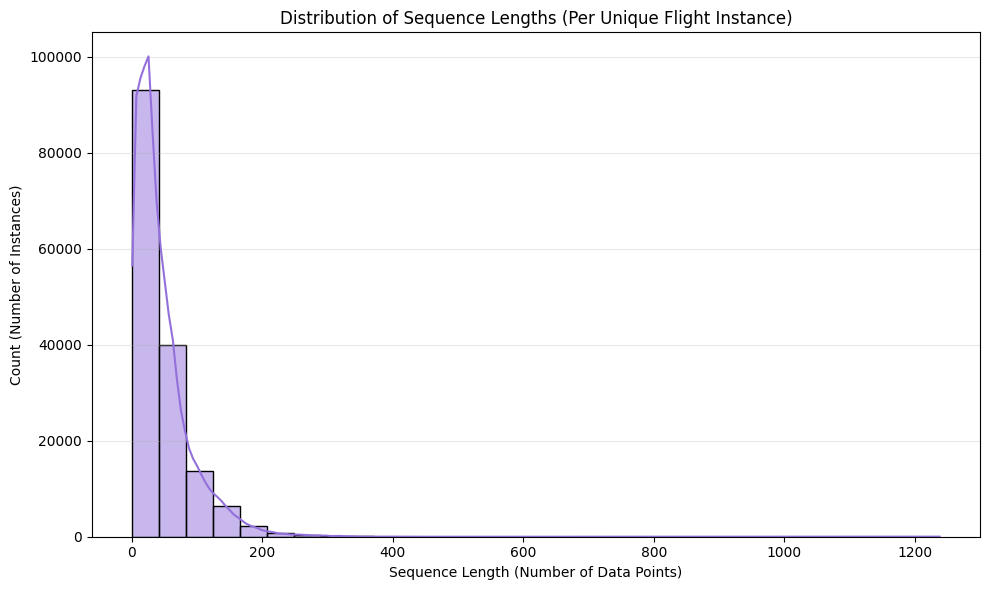


[A74992_2] 인스턴스의 비행 경로를 시각화합니다.


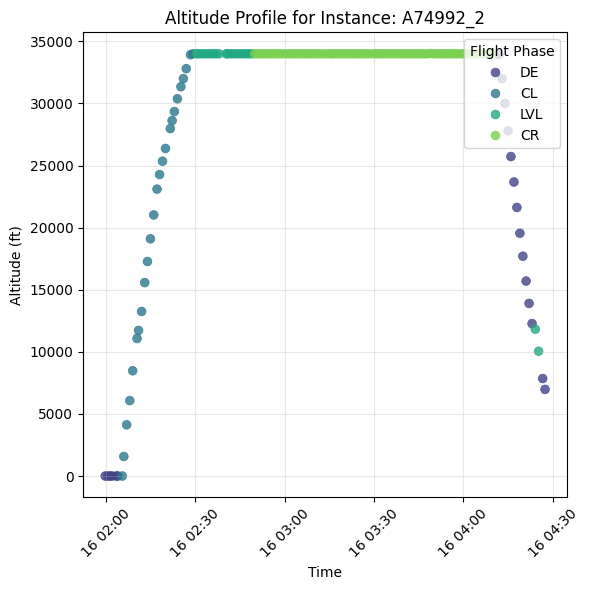

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------------------------------------
# 1. 시퀀스 길이 히스토그램 (Instance별)
# ---------------------------------------------------------

# HexIdent가 아니라, 새로 만든 'Unique_ID'를 기준으로 길이를 셉니다.
# (전처리 단계에서 20개 미만은 걸러냈으므로, 모두 20 이상일 것입니다)
seq_counts = df_final.groupby('Unique_ID').size()

print(f"가장 짧은 비행 길이: {seq_counts.min()}")
print(f"가장 긴 비행 길이: {seq_counts.max()}")

plt.figure(figsize=(10, 6))
sns.histplot(seq_counts, bins=30, kde=True, color='mediumpurple')

plt.title('Distribution of Sequence Lengths (Per Unique Flight Instance)')
plt.xlabel('Sequence Length (Number of Data Points)')
plt.ylabel('Count (Number of Instances)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
# plt.savefig('instance_length_histogram.png')
plt.show()


# ---------------------------------------------------------
# 2. 특정 Instance의 Altitude-Time 산점도 (Phase별 색상)
# ---------------------------------------------------------

# 가장 데이터가 긴(풍부한) Instance 하나를 뽑아서 그립니다.
# target_id = seq_counts.idxmax()  
# sample_key = list(instance_dict.keys())[40000]
target_id = "A74992_2"
# 또는 특정 ID를 직접 지정하고 싶다면: target_id = 'F3E9B_0'

print(f"\n[{target_id}] 인스턴스의 비행 경로를 시각화합니다.")

# 해당 ID의 데이터만 추출
subset = df_final[df_final['Unique_ID'] == target_id].copy()

# 시각화 오류 방지를 위해 Phase가 NaN인 경우 처리
subset['Phase'] = subset['Phase'].fillna('Unknown')

plt.figure(figsize=(6, 6))

# scatterplot 그리기
sns.scatterplot(
    data=subset,
    x='Timestamp',
    y='Altitude',
    hue='Phase',       # Phase에 따라 색깔 구분
    palette='viridis', # 색상 테마 (viridis, deep, set1 등)
    s=40,              # 점 크기
    alpha=0.8,         # 투명도
    edgecolor=None     # 점 테두리 없음
)

plt.title(f'Altitude Profile for Instance: {target_id}')
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')

# X축 날짜/시간이 겹치지 않게 회전
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Flight Phase', loc='upper right')

plt.tight_layout()
# plt.savefig(f'altitude_scatter_{target_id}.png')
plt.show()

In [84]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
import os

class FlightTimeSeriesDataset(Dataset):
    def __init__(self, instance_dict, window_size=30, stride=1, phase_col='Phase', stat_path='./stats.npz'):
        """
        Args:
            instance_dict: {Unique_ID: DataFrame}
            stat_path: mean, std, phase_map을 저장/로드할 경로
        """
        self.window_size = window_size
        self.stride = stride
        self.instance_dict = instance_dict
        self.phase_col = phase_col
        self.stat_path = stat_path
        
        # 메타 데이터 리스트 (어떤 인스턴스의 몇 번째 인덱스를 가져올지 저장)
        self.samples = [] 
        
        # 1. Feature 정의 (TimeDelta는 내부 계산)
        self.raw_features = [
            'Altitude', 'GroundSpeed', 'Track', 
            'Latitude', 'Longitude', 'VerticalRate'
        ]
        
        # ---------------------------------------------------------
        # Step 1: 통계값(Mean, Std) 및 Label Map 로드 또는 계산
        # ---------------------------------------------------------
        if os.path.exists(stat_path):
            print(f"📂 저장된 통계 파일을 로드합니다: {stat_path}")
            loaded = np.load(stat_path, allow_pickle=True)
            self.mean = loaded['mean']
            self.std = loaded['std']
            self.phase_map = loaded['phase_map'].item()
            self.idx_to_phase = {v: k for k, v in self.phase_map.items()}
        else:
            print("📊 통계 파일이 없습니다. 새로 계산합니다...")
            self._calculate_stats_and_map()
            
        print(f"✅ Label Map: {self.phase_map}")

        # ---------------------------------------------------------
        # Step 2: Indexing (어떤 데이터를 꺼낼지 주소록 만들기)
        # ---------------------------------------------------------
        print("⏳ 샘플 인덱싱 생성 중...")
        for unique_id, df in instance_dict.items():
            if len(df) < window_size:
                continue
                
            # Window 개수 계산
            num_samples = (len(df) - window_size) // stride + 1
            
            for i in range(num_samples):
                start_idx = i * stride
                # (DataFrame Key, Start Index) 튜플 저장 -> 메모리 절약
                self.samples.append((unique_id, start_idx))
                
        print(f"✅ Dataset 준비 완료! 총 샘플 수: {len(self.samples)}")

    def _calculate_stats_and_map(self):
        """전체 데이터를 순회하며 Mean, Std 계산 및 Label Map 생성"""
        all_data_list = []
        all_phases = set()
        
        for df in self.instance_dict.values():
            # (1) Time Delta
            dt = df['Timestamp'].diff().dt.total_seconds().fillna(0).values.reshape(-1, 1)
            # (2) Features
            others = df[self.raw_features].interpolate().fillna(0).values
            
            combined = np.hstack([dt, others])
            all_data_list.append(combined)
            
            # Label 수집
            unique_phases = df[self.phase_col].dropna().unique()
            all_phases.update(unique_phases)
            
        # 통계 계산
        full_data = np.vstack(all_data_list)
        self.mean = np.mean(full_data, axis=0)
        self.std = np.std(full_data, axis=0)
        self.std[self.std == 0] = 1.0 # 0 나누기 방지
        
        # Label Map 생성
        sorted_phases = sorted(list(all_phases))
        self.phase_map = {phase: idx for idx, phase in enumerate(sorted_phases)}
        self.idx_to_phase = {idx: phase for phase, idx in self.phase_map.items()}
        
        # 저장
        np.savez(self.stat_path, mean=self.mean, std=self.std, phase_map=self.phase_map)
        print(f"💾 통계 및 맵이 저장되었습니다: {self.stat_path}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        """여기서 실시간으로 데이터를 자르고 정규화함"""
        unique_id, start_idx = self.samples[idx]
        df = self.instance_dict[unique_id]
        
        end_idx = start_idx + self.window_size
        
        # 1. 데이터 슬라이싱 (Pandas iloc 사용)
        # 필요한 부분만 잘라냄
        subset = df.iloc[start_idx : end_idx]
        
        # 2. Feature 추출
        # 주의: Time Delta는 전체 df 기준이 아니라, 잘린 윈도우 내에서의 차이가 아님.
        # 원본 데이터의 연속성을 유지해야 하므로, 미리 계산된 값을 쓰거나
        # 여기서 계산하되 첫 번째 값 처리에 유의해야 함.
        # 가장 안전한 방법: 전체 DF에서 dt를 미리 계산해두는 것이 좋지만, 
        # 여기서는 부분 계산 로직을 그대로 유지하되 윈도우 내 첫 값은 0이 될 수 있음을 감안.
        
        # (더 효율적인 방식: __init__에서 각 DF에 'dt' 컬럼을 미리 추가해두는 것 추천)
        # 여기서는 원본 로직 유지:
        dt = subset['Timestamp'].diff().dt.total_seconds().fillna(0).values.reshape(-1, 1)
        others = subset[self.raw_features].interpolate().fillna(0).values # 부분 보간
        
        raw_x = np.hstack([dt, others])
        
        # 3. [핵심] 정규화 (실시간 수행)
        normalized_x = (raw_x - self.mean) / self.std
        
        # 4. Label 가져오기 (마지막 시점)
        last_phase_str = subset[self.phase_col].iloc[-1]
        y_label = self.phase_map.get(last_phase_str, -1) # 없으면 -1
        
        return torch.FloatTensor(normalized_x), torch.LongTensor([int(y_label)])

    def decode_label(self, idx):
        return self.idx_to_phase.get(idx, "Unknown")


In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report # 라벨별 정확도 계산용 (sklearn 안쓴다고 하셨지만 metrics 계산엔 유용. 안쓰려면 직접 계산 코드 대체 가능)
import torch
import torch.nn as nn
import torch.optim as optim

class FlightPhaseLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.2):
        super(FlightPhaseLSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM Layer
        # batch_first=True: 입력이 (Batch, Seq, Feature) 순서
        self.lstm = nn.LSTM(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers, 
            batch_first=True, 
            dropout=dropout if num_layers > 1 else 0
        )
        
        # Classifier (Fully Connected)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # x shape: (Batch, Window_Size, Input_Size)
        
        # 초기 Hidden State와 Cell State (0으로 초기화)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # LSTM 순전파
        # out shape: (Batch, Window_Size, Hidden_Size)
        out, _ = self.lstm(x, (h0, c0))
        
        # Many-to-One: 마지막 Time Step의 결과만 사용
        last_out = out[:, -1, :] 
        
        # 분류
        logits = self.fc(last_out)
        return logits


In [86]:
%cd /scratch2/whwjdqls99/phase_detection

/scratch2/whwjdqls99/phase_detection


In [ ]:

# 설정
WINDOW_SIZE = 30
STRIDE = 15
BATCH_SIZE = 512

# 1. Dataset 생성
# (instance_dict는 이전에 만든 것을 그대로 사용)
dataset = FlightTimeSeriesDataset(instance_dict, window_size=WINDOW_SIZE, stride=STRIDE)

# 2. DataLoader 생성
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# 3. 확인
data_iter = iter(dataloader)
features, labels = next(data_iter)

print("\n[검증 결과]")
print(f"Input Features Shape: {features.shape}") # (Batch, 30, 7)
print(f"Labels Shape: {labels.shape}")           # (Batch, 1)

# 데이터가 정규화가 잘 되었는지 확인 (0 근처의 값이어야 함)
print("\n[Sample Data - First Timestep Features]")
print("순서: [DeltaTime, Alt, GSpd, Trk, Lat, Lon, VRate]")
print(features[0][0].numpy()) # 첫 배치, 첫 윈도우, 첫 타임스텝





📊 통계 파일이 없습니다. 새로 계산합니다...


💾 통계 및 맵이 저장되었습니다: ./stats.npz
✅ Label Map: {'CL': 0, 'CR': 1, 'DE': 2, 'GND': 3, 'LVL': 4}
⏳ 샘플 인덱싱 생성 중...
✅ Dataset 준비 완료! 총 샘플 수: 291995

[검증 결과]
Input Features Shape: torch.Size([512, 30, 7])
Labels Shape: torch.Size([512, 1])

[Sample Data - First Timestep Features]
순서: [DeltaTime, Alt, GSpd, Trk, Lat, Lon, VRate]
[-0.86184376  0.9740166   0.00712997 -0.72981274  0.19465995 -0.84445864
  0.01873956]
📊 전체 데이터: 291995
🔹 학습용(Train): 233596
🔸 검증용(Val):   58399
🚀 학습 및 검증 시작...


KeyboardInterrupt: 

In [88]:
# ---------------------------------------------------------
# 1. Dataset Split (Train: 80%, Val: 20%)
# ---------------------------------------------------------

BATCH_SIZE = 2048

# 전체 데이터셋 크기 확인
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size

# random_split을 이용해 무작위로 분할
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f"📊 전체 데이터: {dataset_size}")
print(f"🔹 학습용(Train): {len(train_dataset)}")
print(f"🔸 검증용(Val):   {len(val_dataset)}")

# DataLoader 생성 (Val은 shuffle=False가 일반적)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# ---------------------------------------------------------
# 설정 및 초기화
# ---------------------------------------------------------
INPUT_SIZE = 7
HIDDEN_SIZE = 64
NUM_LAYERS = 2
NUM_CLASSES = len(dataset.phase_map)
LEARNING_RATE = 0.001
EPOCHS = 20
LOG_INTERVAL = 50  # [추가] 50번째 배치마다 로그 출력 (데이터 크기에 맞춰 조절하세요)

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FlightPhaseLSTM(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Best Model 저장을 위한 변수
best_val_loss = float('inf')
save_path = 'best_flight_phase_lstm.pth'

print(f"🚀 학습 및 검증 시작... (Log Interval: {LOG_INTERVAL})")

# ---------------------------------------------------------
# 학습 루프
# ---------------------------------------------------------
for epoch in range(EPOCHS):
    # ==========================
    # 1. Training Phase
    # ==========================
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    
    # 배치 개수 파악
    total_batches = len(train_loader)
    
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(DEVICE)
        targets = targets.squeeze().to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

        # [추가] 중간 로그 출력
        if (batch_idx + 1) % LOG_INTERVAL == 0:
            current_loss = loss.item()
            current_acc = 100 * (predicted == targets).sum().item() / targets.size(0)
            print(f"   [Epoch {epoch+1}/{EPOCHS}] Batch {batch_idx+1}/{total_batches} | Loss: {current_loss:.4f} | Acc: {current_acc:.2f}%")

    avg_train_loss = train_loss / len(train_loader)
    train_acc = 100 * train_correct / train_total

    # ==========================
    # 2. Validation Phase
    # ==========================
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    
    all_targets = []
    all_preds = []
    
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.to(DEVICE)
            targets = targets.squeeze().to(DEVICE)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            
            val_total += targets.size(0)
            val_correct += (predicted == targets).sum().item()
            
            all_targets.extend(targets.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total

    # ==========================
    # 3. 결과 출력 및 저장
    # ==========================
    print(f"\n✅ Epoch [{epoch+1}/{EPOCHS}] 완료")
    print(f"   Train | Loss: {avg_train_loss:.4f} | Acc: {train_acc:.2f}%")
    print(f"   Val   | Loss: {avg_val_loss:.4f}   | Acc: {val_acc:.2f}%")
    
    if avg_val_loss < best_val_loss:
        print(f"   💾 Validation Loss 개선! ({best_val_loss:.4f} -> {avg_val_loss:.4f}) 모델 저장 중...")
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), save_path)
    
    # ==========================
    # 4. 라벨별 정확도 (Class-wise Accuracy)
    # ==========================
    print("   [Label-wise Accuracy]")
    
    class_correct = {i: 0 for i in range(NUM_CLASSES)}
    class_total = {i: 0 for i in range(NUM_CLASSES)}
    
    for t, p in zip(all_targets, all_preds):
        class_total[t] += 1
        if t == p:
            class_correct[t] += 1
            
    for idx in range(NUM_CLASSES):
        label_name = dataset.decode_label(idx)
        count = class_total[idx]
        if count > 0:
            acc = 100 * class_correct[idx] / count
            print(f"     - {label_name:<5}: {acc:.1f}% ({class_correct[idx]}/{count})")
        else:
            print(f"     - {label_name:<5}: N/A")
    
    print("-" * 60) # 구분선

print("\n🎉 모든 학습이 완료되었습니다.")
print(f"🏆 최고의 모델은 '{save_path}'에 저장되었습니다.")

📊 전체 데이터: 291995
🔹 학습용(Train): 233596
🔸 검증용(Val):   58399
🚀 학습 및 검증 시작... (Log Interval: 50)
   [Epoch 1/20] Batch 50/115 | Loss: 0.6468 | Acc: 78.22%
   [Epoch 1/20] Batch 100/115 | Loss: 0.5382 | Acc: 80.42%

✅ Epoch [1/20] 완료
   Train | Loss: 0.7546 | Acc: 72.77%
   Val   | Loss: 0.5066   | Acc: 82.55%
   💾 Validation Loss 개선! (inf -> 0.5066) 모델 저장 중...
   [Label-wise Accuracy]
     - CL   : 2.1% (48/2262)
     - CR   : 97.0% (28800/29700)
     - DE   : 79.2% (12928/16320)
     - GND  : 0.0% (0/611)
     - LVL  : 67.7% (6435/9506)
------------------------------------------------------------
   [Epoch 2/20] Batch 50/115 | Loss: 0.4392 | Acc: 84.42%
   [Epoch 2/20] Batch 100/115 | Loss: 0.3204 | Acc: 89.70%

✅ Epoch [2/20] 완료
   Train | Loss: 0.4007 | Acc: 86.15%
   Val   | Loss: 0.2962   | Acc: 90.23%
   💾 Validation Loss 개선! (0.5066 -> 0.2962) 모델 저장 중...
   [Label-wise Accuracy]
     - CL   : 43.7% (988/2262)
     - CR   : 96.2% (28567/29700)
     - DE   : 90.2% (14714/16320)
     -

# HEURISTIC

In [31]:
import pandas as pd
import os

# 1. 파일 경로 설정
file_path = '/scratch2/tjgus0408/CMU/data/Labeled_Heuristic.csv'

# 2. 사용할 컬럼 목록 정의
selected_columns = [
    'HexIdent', 
    'Date_MSG_Generated', 
    'Time_MSG_Generated',
    'Date_MSG_Logged', 
    'Time_MSG_Logged', 
    'Altitude', 
    'GroundSpeed',
    'Track', 
    'Latitude', 
    'Longitude', 
    'VerticalRate', 
    'IsOnGround',
    "Phase"
]

# usecols 파라미터를 사용하여 필요한 컬럼만 읽어오면 메모리를 절약할 수 있습니다.
df_H = pd.read_csv(file_path, usecols=selected_columns)

print("✅ 데이터 로드 성공!")
print(f"데이터 크기 (행, 열): {df_H.shape}")

# 데이터 미리보기
print("\n[상위 5개 행]")
print(df_H.head())

# 데이터 타입 및 결측치 확인
print("\n[데이터 정보]")
print(df_H.info())


✅ 데이터 로드 성공!
데이터 크기 (행, 열): (7381668, 13)

[상위 5개 행]
  HexIdent Date_MSG_Generated Time_MSG_Generated Date_MSG_Logged  \
0        1         2025-12-15           20:23:19      2025-12-15   
1        1         2025-12-15           20:24:31      2025-12-15   
2        1         2025-12-15           20:25:03      2025-12-15   
3        1         2025-12-15           20:26:08      2025-12-15   
4        1         2025-12-15           20:31:18      2025-12-15   

  Time_MSG_Logged  Altitude  GroundSpeed       Track   Latitude  Longitude  \
0        20:23:16    1575.0   112.893753   18.595440  26.898514 -80.541351   
1        20:24:28    1575.0   118.067780   88.058510  26.907257 -80.505890   
2        20:25:03    1575.0   118.016945   89.028976  26.907990 -80.482147   
3        20:26:07    1575.0   122.004097   89.530373  26.908173 -80.442627   
4        20:31:15     600.0    75.000000  141.000000  31.397873 -85.479828   

   VerticalRate  IsOnGround Phase  
0             0         NaN    CR

In [33]:

print("⏳ 날짜와 시간 병합 중...")
df_H['Timestamp'] = pd.to_datetime(df_H['Date_MSG_Generated'] + ' ' + df_H['Time_MSG_Generated'])

# 1. 고유한 값 추출 (NumPy 배열 형태)
df_H_multi = df_H.sort_values(by=['HexIdent', 'Timestamp']).set_index(['HexIdent', 'Timestamp'])
unique_hex_ids = df_H["HexIdent"].unique()

# 2. (선택 사항) 파이썬 리스트 형태로 변환 (다루기 더 편함)
hex_id_list = unique_hex_ids.tolist()

# 결과 확인
print(f"총 고유 ID 개수: {len(hex_id_list)}")
print("ID 목록 (상위 10개):", hex_id_list[:10])

⏳ 날짜와 시간 병합 중...
총 고유 ID 개수: 52712
ID 목록 (상위 10개): ['1', '1007D', '10086', '100A2', '100A3', '100A6', '100A7', '100CF', '100DB', '100DC']


[71BE25] 항공기의 데이터로 산점도를 그립니다.


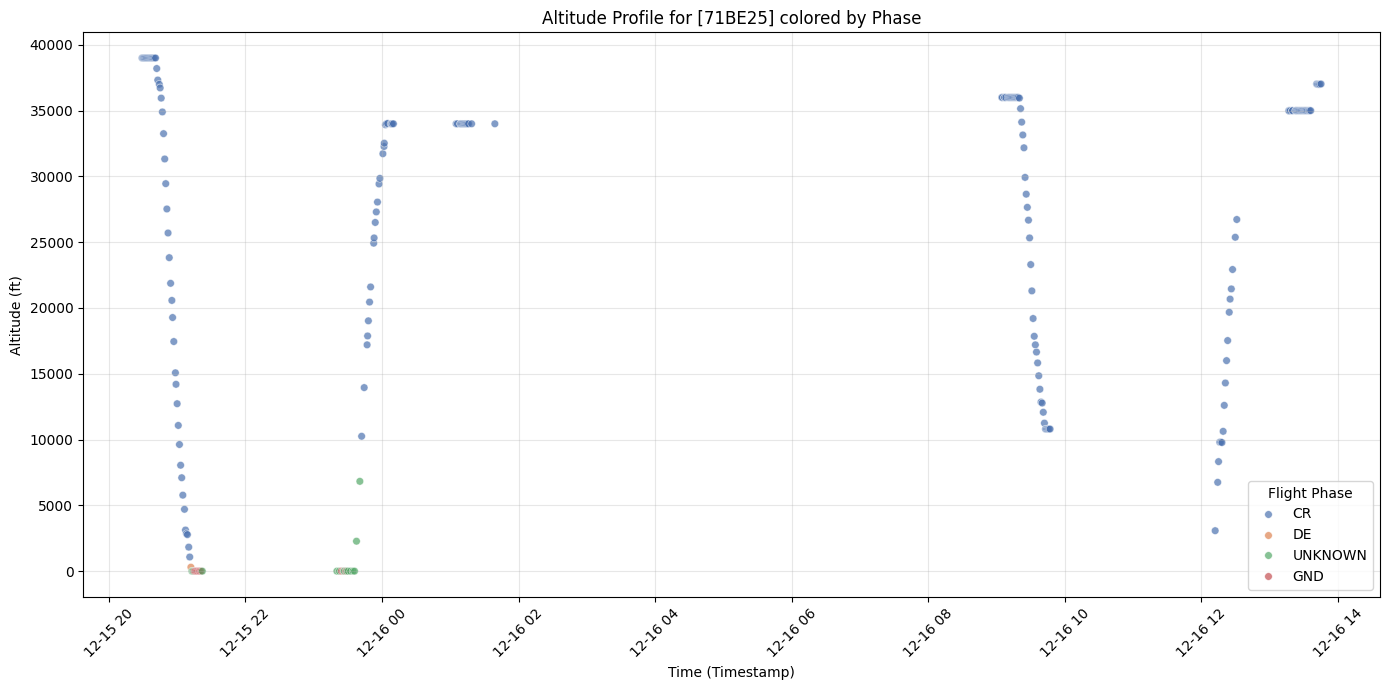

In [38]:
target_hex = '71BE25'

print(f"[{target_hex}] 항공기의 데이터로 산점도를 그립니다.")

# (2) 해당 항공기의 데이터만 추출
# 딕셔너리 방식(ts_dict)을 썼다면: subset_df = ts_dict[target_hex]
# 원본 df에서 필터링하는 방식:
subset_df_h = df_H[df_H['HexIdent'] == target_hex].copy()

# (3) Phase 컬럼의 결측치가 있다면 'Unknown' 등으로 채워주거나 제거 (시각화 오류 방지)
subset_df_h['Phase'] = subset_df_h['Phase'].fillna('Unknown')

# (4) 산점도 그리기
plt.figure(figsize=(14, 7))

# scatterplot의 hue 파라미터에 'Phase' 컬럼을 지정하면 자동으로 색깔이 구분됩니다.
# palette 옵션으로 특정 색상을 지정할 수도 있습니다 (예: {'CL':'red', 'CR':'green'}).
sns.scatterplot(
    data=subset_df_h,
    x='Timestamp',
    y='Altitude',
    hue='Phase',    # Phase에 따라 색상 구분
    palette='deep', # Seaborn 색상 팔레트 사용
    s=30,           # 점 크기
    alpha=0.7       # 투명도
)

plt.title(f'Altitude Profile for [{target_hex}] colored by Phase')
plt.xlabel('Time (Timestamp)')
plt.ylabel('Altitude (ft)')
plt.xticks(rotation=45) # X축 시간 라벨이 겹치지 않게 회전
plt.grid(True, alpha=0.3)
plt.legend(title='Flight Phase')

# (5) 플롯 저장 및 표시
plt.tight_layout()
# plt.savefig(f'altitude_scatter_{target_hex}.png')
plt.show()